# Movie reviews
## Machine Learning Course Project
---
### Author: Andrea Alberti  
### Date: April 2023
---
## Data: 
This project is about predicting the polarity of a movie review, classifying it to positve or to negative. The available dataset is composed by the movie reviews written by the users of the IMDB website (www.imdb.com).

## Goal:
Fit a Multinomial Naive Bayes Classifier model, analyze it and answer some questions.

In [16]:
#import the file in which the functions are defined
from MR_functions import *

#insert the vocabulary size to be used in the accuracies.txt file
voc_size = voc_stopwords_size = voc_stemming_size = voc_stopwords_stemmed_size = 1000

#directories paths
pos_test_dir_bow = 'Dataset/test/pos/'
neg_test_dir_bow = 'Dataset/test/neg/'
pos_valid_dir_bow = 'Dataset/validation/pos/'
neg_valid_dir_bow = 'Dataset/validation/neg/'
pos_train_dir_bow = 'Dataset/train/pos/'
neg_train_dir_bow = 'Dataset/train/neg/'

## 1 - Model building

- 1.1 Build a vocabulary (done by the MR_generation_voc_bow.py script)

The vocabulary is built listing the 1000 most common words taking them from both negative and positive reviews.

- 1.2 Extract  the  features (done by the MR_generation_voc_bow.py script)

The feature extraction phase consists in building the bag of words representation for all the files we need. In particular, the bag of words representation is a matrix in which each row is a txt file and each column is a word of the vocabulary just built. The values are the number of times a specific vocabulary word appears into the txt file.

- 1.3 Train a classifier  

The model used is the Naive Bayesian Classifier. So the training phase consists in learning:

1. The probability distribution of each word inside each class (relative frequency)
2. The probability distribution for the class (relative frequency)


In [2]:
#load BoW stored
bow_train = np.loadtxt('Generated/bow_train.txt.gz')
bow_test = np.loadtxt('Generated/bow_test.txt.gz')

#computing parameters
distributions = binary_NBC_training(bow_train)

#applying NBC to training data
predictions_train = binary_NBC_inference(bow_train, distributions)

#applying NBC to test data
predictions_test = binary_NBC_inference(bow_test, distributions)

#computing accuracies and store results for comparison
training_accuracy = (predictions_train == bow_train[:,-1]).mean()
print('The training accuracy is %4.3f' %training_accuracy)
store_results(training_accuracy.astype(str), 'Generated/accuracies.txt', 'train', str(voc_size))

test_accuracy = (predictions_test == bow_test[:,-1]).mean()
print('The test accuracy is %4.3f' %test_accuracy)
store_results(test_accuracy.astype(str), 'Generated/accuracies.txt', 'test', str(voc_size))

The training accuracy is 0.820
The test accuracy is 0.816


- 1.4 Variants
1. Make it so the model ingores very common words
2. make it so the model does not distinguish among words with the same root 

### Model that ingores very common words.

In [3]:
#getting parameters
bow_train_stopwords = np.loadtxt('Generated/bow_train_stopwords.txt.gz')
bow_test_stopwords = np.loadtxt('Generated/bow_test_stopwords.txt.gz')

#training algorithm
parameters_stopwords = binary_NBC_training(bow_train_stopwords)

#inference
prediction_stopwords_train = binary_NBC_inference(bow_train_stopwords, parameters_stopwords)
prediction_stopwords_test = binary_NBC_inference(bow_test_stopwords, parameters_stopwords)

#computing accuracies and store results for comparison
training_accuracy_stopwords = (prediction_stopwords_train == bow_train_stopwords[:,-1]).mean()
print('The training accuracy eliminating stopwords is: %4.3f' %training_accuracy_stopwords)
store_results(training_accuracy_stopwords.astype(str), 'Generated/accuracies.txt', 'train_stopwords', str(voc_stopwords_size))

test_accuracy_stopwords = (prediction_stopwords_test == bow_test_stopwords[:, -1]).mean()
print('The test accuracy eliminating stopwords is: %4.3f' %test_accuracy_stopwords)
store_results(test_accuracy_stopwords.astype(str), 'Generated/accuracies.txt', 'test_stopwords', str(voc_stopwords_size))

The training accuracy eliminating stopwords is: 0.829
The test accuracy eliminating stopwords is: 0.826


### Model that doesn't distinguish among words with the same root


In [4]:
#getting parameters
bow_train_stemming = np.loadtxt('Generated/bow_train_stemming.txt.gz')
bow_test_stemming = np.loadtxt('Generated/bow_test_stemming.txt.gz')

#training algorithm
parameters_stemming = binary_NBC_training(bow_train_stemming)

#inference
prediction_stemming_train = binary_NBC_inference(bow_train_stemming, parameters_stemming)
prediction_stemming_test = binary_NBC_inference(bow_test_stemming, parameters_stemming)

#computing accuracies and store results for comparison
training_accuracy_stemming = (prediction_stemming_train == bow_train_stemming[:,-1]).mean()
print('The training accuracy introducing stemming is: %4.3f' %training_accuracy_stemming)
store_results(training_accuracy_stemming.astype(str), 'Generated/accuracies.txt', 'train_stemming', str(voc_stemming_size))

test_accuracy_stemming = (prediction_stemming_test == bow_test_stemming[:, -1]).mean()
print('The test accuracy introducing stemming is: %4.3f' %test_accuracy_stemming)
store_results(test_accuracy_stemming.astype(str), 'Generated/accuracies.txt', 'test_stemming', str(voc_stemming_size))


The training accuracy introducing stemming is: 0.823
The test accuracy introducing stemming is: 0.817


### Vocabulary that unifies stemming and stopwords exclusion

In [5]:
#getting parameters
bow_train_stemming = np.loadtxt('Generated/bow_train_stopwords_stemmed.txt.gz')
bow_test_stemming = np.loadtxt('Generated/bow_test_stopwords_stemmed.txt.gz')

#training algorithm
parameters_stemming = binary_NBC_training(bow_train_stemming)

#inference
prediction_stemming_train = binary_NBC_inference(bow_train_stemming, parameters_stemming)
prediction_stemming_test = binary_NBC_inference(bow_test_stemming, parameters_stemming)

#computing accuracies and store results for comparison
training_accuracy_stemming = (prediction_stemming_train == bow_train_stemming[:,-1]).mean()
print('The training accuracy introducing stemming and stopwords is: %4.3f' %training_accuracy_stemming)
store_results(training_accuracy_stemming.astype(str), 'Generated/accuracies.txt', 'train_stopwords_stemmed', str(voc_stopwords_stemmed_size))

test_accuracy_stemming = (prediction_stemming_test == bow_test_stemming[:, -1]).mean()
print('The test accuracy introducing stemming and stopwords is: %4.3f' %test_accuracy_stemming)
store_results(test_accuracy_stemming.astype(str), 'Generated/accuracies.txt', 'test_stopwords_stemmed', str(voc_stopwords_stemmed_size))

The training accuracy introducing stemming and stopwords is: 0.826
The test accuracy introducing stemming and stopwords is: 0.820


1.5 Analysis

1. Identify the most impactful words on the predictions made by the model.

The most impactful words for a class are computed as the words whose score gap between the two classes is the largest (positive for positive words and negative for negative words).


Since the introduction of the stopwords improved the model performance, the most impactful words are taken from the vocabulary_stopwords_1000.txt

In [5]:
#load vocabulary
voc_stopwords = np.loadtxt('Generated/vocabulary_stopwords.txt', dtype=str)

#getting parameters (actually it is redundant if the code has already been completely executed)
bow_train_stopwords = np.loadtxt('Generated/bow_train_stopwords.txt.gz')

#training algorithm (actually redundant for the same reason as above)
parameters_stopwords = binary_NBC_training(bow_train_stopwords)

#getting probabilities
pos_p = parameters_stopwords['pos_p']
neg_p = parameters_stopwords['neg_p']
delta = pos_p - neg_p

#get the indices of the sorted array
indices = delta.argsort()

#print results and store results for easier insertion in latex
with open('Generated/impactful_words.txt', 'w') as f:
    print("NEGATIVE WORDS", file = f)
    for i in indices[:10]:
        print(voc_stopwords[i], delta[i], file = f)

    print('', file = f)
    print("POSITIVE WORDS", file = f)
    for i in indices[-1:-11:-1]:
        print(voc_stopwords[i], delta[i], file = f)
        

2. Identify the worst errors on the test set.
The worst errors are the misclassified reviews whose score gap between the two classes is the largest.

<AxesSubplot: title={'center': 'False negative reviews'}, xlabel='Review name', ylabel='Score'>

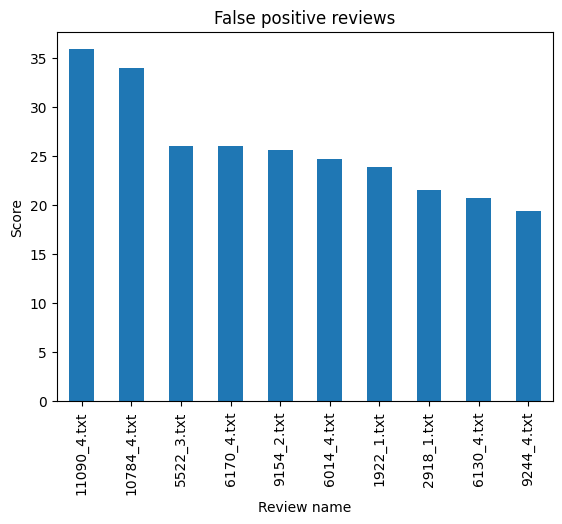

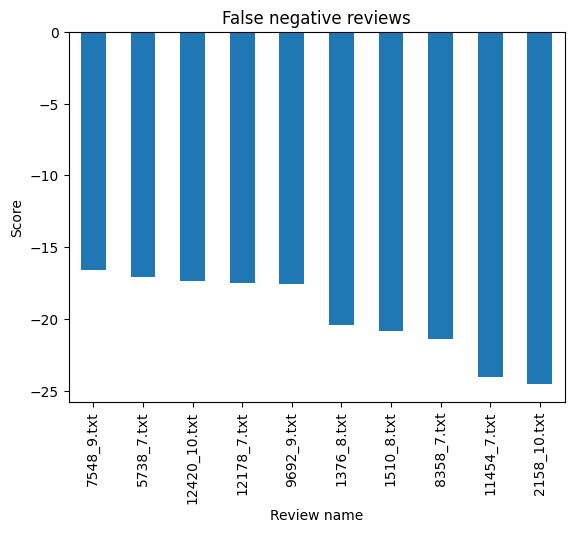

In [67]:
revnames = os.listdir(neg_test_dir_bow) #list of the name of the negative reviews files
revnames.extend(os.listdir(pos_test_dir_bow))
#getting parameters (actually it is redundant if the code has already been completely executed)
bow_train_stopwords = np.loadtxt('Generated/bow_train_stopwords.txt.gz')
bow_test_stopwords = np.loadtxt('Generated/bow_test_stopwords.txt.gz')
#training algorithm (actually redundant for the same reason as above)
parameters_stopwords = binary_NBC_training(bow_train_stopwords)
#inference
prediction_stopwords_test, pos_rev_scores, neg_rev_scores = binary_NBC_inference(bow_test_stopwords, parameters_stopwords, list_scores=True)

delta = pos_rev_scores - neg_rev_scores
c = pd.DataFrame({'revnames': revnames, 'delta': delta})
c = c[prediction_stopwords_test != bow_test_stopwords[:, -1]]
c.sort_values(by='delta', ascending=False, inplace=True)
false_positive = c.head(10)
false_negative = c.tail(10)
false_positive.plot(x = 'revnames', y = 'delta', kind = 'bar', title = 'False positive reviews', ylabel = 'Score', xlabel = 'Review name', legend = False)
false_negative.plot(x = 'revnames', y = 'delta', kind = 'bar', title = 'False negative reviews', ylabel = 'Score', xlabel = 'Review name', legend = False)


## 2 - Assignments

2.1 Comparison changing vocabulary size

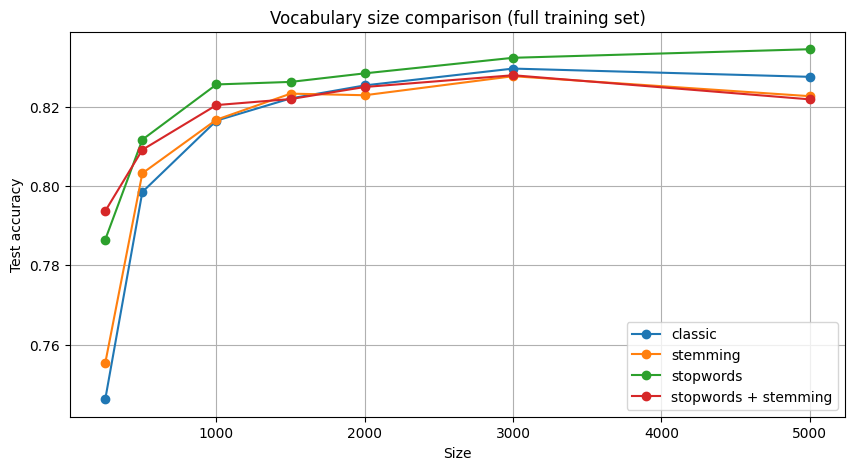

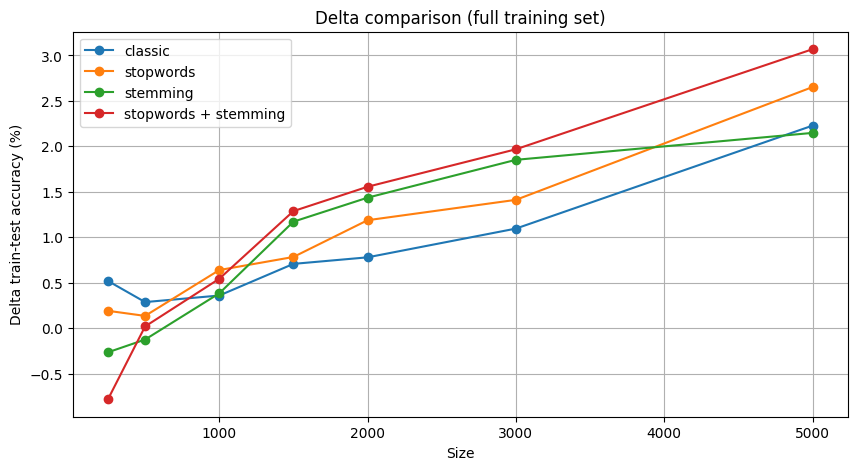

In [10]:
#prepare data for plotting
with open('Generated/accuracies.txt') as f:
    s = f.read()
accs = s.split()
numrows = len(accs)/3
accs = np.reshape(accs, (int(numrows),3))
df = pd.DataFrame(data = accs, columns = ['size', 'type', 'score'])
df['score'] = df['score'].astype(float)
df['size'] = df['size'].astype(int)

df = df.drop_duplicates()

# create boolean mask to select rows to keep
mask = ~df['type'].str.startswith('train')

# select rows to keep using boolean indexing
df_filtered = df[mask]

# pivot the data to create columns for each type
df_pivot = df_filtered.pivot(index='size', columns='type', values='score')

#rename to be consistent in the two plots
newnames = {'test': 'classic', 'test_stopwords': 'stopwords', 'test_stemming': 'stemming', 'test_stopwords_stemmed': 'stopwords + stemming'}
df_pivot.rename(columns = newnames, inplace = True)

# plot the lines
ax = df_pivot.plot(figsize=(10,5), grid = True, marker = 'o', title = 'Vocabulary size comparison (full training set)', xlabel = 'Size', ylabel = 'Test accuracy')
ax.legend(title = '')
plt.show()

#create a new dataframe with the difference between the train and test accuracies
df_pivot_full = df.pivot(index = 'size', columns = 'type', values = 'score')
df_delta = pd.DataFrame()
type = ['classic', 'stopwords', 'stemming', 'stopwords + stemming']
for i in range(4):
    df_delta[type[i]] = (df_pivot_full[df_pivot_full.columns[i+4]] - df_pivot_full[df_pivot_full.columns[i]])*100

#plot the new dataframe
df_delta.plot(figsize=(10,5), grid = True, marker = 'o', title = 'Delta comparison (full training set)', xlabel = 'Size', ylabel = 'Delta train-test accuracy (%)')
plt.show()

### Logistic Regression approach

In [2]:
from MR_functions import *

#Load data
bow_train_stopwords = np.loadtxt('Generated/bow_train_stopwords.txt.gz')
bow_test_stopwords = np.loadtxt('Generated/bow_test_stopwords.txt.gz')

#Split data
X_train = bow_train_stopwords[:, :-1]
Y_train = bow_train_stopwords[:, -1]
X_test = bow_test_stopwords[:, :-1]
Y_test = bow_test_stopwords[:, -1]

#train and test
w_theta, b_theta, train_accuracies, losses, ITC = logreg_training(X_train, Y_train, steps = 300000, lr = 0.0023, tol = 0.0001)
probabilities = logreg_inference(X_test, w_theta, b_theta)
np.savez('Generated/logreg_parameters.npz', w_theta = w_theta, b_theta = b_theta)

#display results
prediction = probabilities > 0.5
lr_test_acc = (prediction == Y_test).mean()
print('The test accuracy is: ', lr_test_acc)
print('The train accuracy is: ', train_accuracies[-1])
print('The ITC is: ', ITC)

#compute worst errors and show them
revnames = os.listdir(neg_test_dir_bow) #list of the name of the negative reviews files
revnames.extend(os.listdir(pos_test_dir_bow))
c = pd.DataFrame({'revnames': revnames, 'delta': X_test@w_theta})
c = c[prediction != Y_test]
c.sort_values(by='delta', ascending=False, inplace=True)
false_positive = c.head(10)
false_negative = c.tail(10)
false_positive.plot(x = 'revnames', y = 'delta', kind = 'bar', title = 'False positive reviews', ylabel = 'Score', xlabel = 'Review name', legend = False)
false_negative.plot(x = 'revnames', y = 'delta', kind = 'bar', title = 'False negative reviews', ylabel = 'Score', xlabel = 'Review name', legend = False)

### Future Work
The code can be improved in many ways:

- It can be made more efficient by avoiding redundant computations.
- A model choice criterion based on Precision and Recall can be added to allow for an higher flexibility in the model selection. For example it is possible
to select a model that favours a classification to negative class, to stimulate improvement in the movie company and to be sure of do not oversee a negative
review simply because it was classified as positive.
- The model can be improved by working on the features. For example the length of the review can be added as a feature.
- Another possible improvement is to use an alternative approach to learn the parameters. For example try to use the Maximum a Posteriori Estimation instead of the
Maximum Likelihood Estimation.